<a href="https://colab.research.google.com/github/vvrgit/ML-Optimization/blob/main/AdaGrad_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AdaGrad Optimizer**

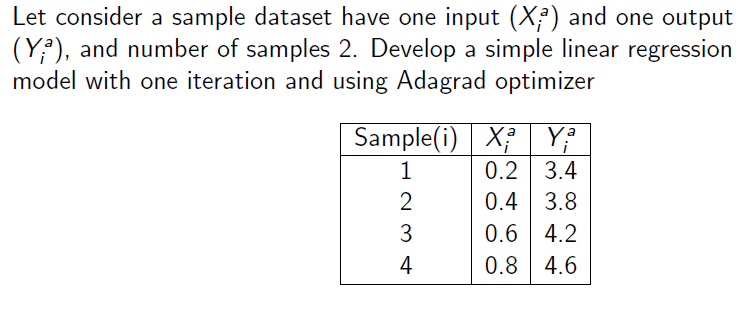

# **Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Libraries**

In [2]:
import numpy as np
import math as mt
import random
import pandas as pd

**Load Data**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/AI Data/sampledata.csv')
data.head()

,X,Y
0,0.2,3.4
1,0.4,3.8
2,0.6,4.2
3,0.8,4.6


**Data Split**

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.X, data.Y, test_size = 0.20, random_state = 10)

# **Initialization**

In [5]:
m=random.uniform(-10,10)
c=random.uniform(-10,10)
eta=0.9
max_iter=10000
ssg_m = 0
ssg_c = 0
eps=mt.pow(10,-8)

**Gradient Calculation**

In [6]:
def gradient(m,c,x,y):
  m_deriv=-1*(y-m*x-c)*x
  c_deriv=-1*(y-m*x-c)
  return m_deriv,c_deriv

**Model Training **

In [7]:
for iter in range(max_iter):
  del_m,del_c=0.0,0.0
  for sample in range(x_train.shape[0]):
    delm,delc=gradient(m,c,x_train.iloc[sample], y_train.iloc[sample])
    del_m=del_m+delm
    del_c=del_c+delc
  del_m=del_m/len(x_train)
  del_c=del_c/len(x_train)
  ssg_m=ssg_m+(del_m*del_m)
  ssg_c=ssg_c+(del_c*del_c)
  m=m-(eta*del_m)/(mt.sqrt(ssg_m+eps))
  c=c-(eta*del_c)/(mt.sqrt(ssg_c+eps))
  #print(f"Iteration: {iter}\tValue of m: {m}, \tValue of c: {c}")

print(f"\nThe local minima occurs at: {m}, {c}")


The local minima occurs at: 2.0000000000000093, 2.9999999999999947


**Training MSE**

In [8]:
q2=len(x_train)
error=0;
for j in range(q2):
    n2=m*x_train.iloc[j]+c
    error=error+(y_train.iloc[j]-n2)**2
error=error/q2
error

6.179410424231259e-30

**Testing MSE**

In [9]:
q1=len(x_test)
error=0;
for j in range(q1):
    n2=m*x_test.iloc[j]+c
    error=error+(y_test.iloc[j]-n2)**2
error=error/q2
error

0.0

**Model Deployment**

In [10]:
X=input('enter X value')
Y=m*float(X)+c
print('Y=',Y)

enter X value0.2
Y= 3.399999999999997


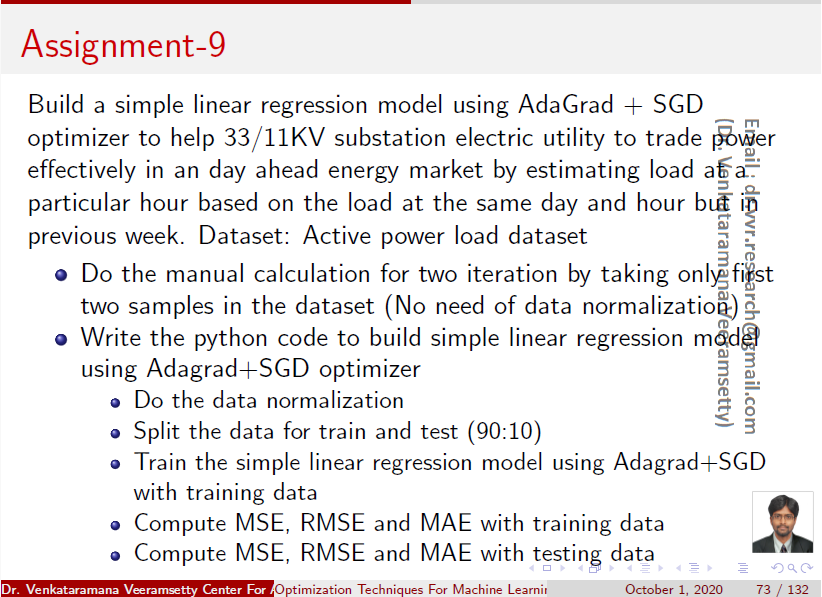

# **Thank You**